# Базові алгоритми машинного навчання: регресія

Автомобільна компанія BestСars прагне вийти на ринок США, створивши там свій виробничий підрозділ і виробляючи автомобілі на місці, щоб скласти конкуренцію своїм американським і європейським колегам.  
- Компанія хоче зрозуміти фактори, що впливають на ціноутворення автомобілів на американському ринку, оскільки вони можуть сильно відрізнятися від національного ринку.
- Після цього компанія планує розробити та запропонувати на ринку США кілька власних моделей автомобілів. А для цього компанії необхідно правильно спрогнозувати ціну на нові моделі автомобілів власного виробництва.  

### На основі різноманітних ринкових досліджень компанія зібрала набір даних про різні типи автомобілів на американському ринку:  

   <ul style = "font-family: 'Segoe UI'; font-size: 16px;" >
        <li><strong>CarID:</strong> ID кожної машини</li>
        <li><strong>CarName:</strong> модель автомобіля</li>
        <li><strong>FuelType:</strong> тип використовуваного палива (бензин, дизель)</li>
        <li><strong>Aspiration:</strong> тип аспірації (стандартний чи турбо)</li>
        <li><strong>NumDoors:</strong> кількість дверей в машині</li>
        <li><strong>CarBody:</strong> тип кузова автомобіля (седан, купе, позашляховик і т. д.)</li>
        <li><strong>DriveWheelType:</strong> тип приводу (передній, задній, повний)</li>
        <li><strong>EngineLocation:</strong> розташування двигуна автомобіля (спереду або позаду)</li>
        <li><strong>CarLength:</strong> загальна довжина автомобіля</li>
        <li><strong>CarWidth:</strong> ширина автомобіля</li>
        <li><strong>CurbWeight:</strong> вага автомобіля без пасажирів та вантажу</li>
        <li><strong>EngineType:</strong> тип двигуна</li>
        <li><strong>NumCylinders:</strong> кількість циліндрів в двигуні</li>
        <li><strong>EngineSize:</strong> об'єм двигуна автомобіля</li>
        <li><strong>FuelSystem:</strong> тип системи подачі палива</li>
        <li><strong>BoreRatio:</strong> діаметр поршня до довжини ходу двигуна</li>
        <li><strong>CarPrice:</strong> ціна автомобіля</li>
    </ul>

In [1]:
# імпортуємо потрібні біблотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#відкриємо файл з даними та зчитаємо вміст файлу в датафрейм
df = pd.read_csv('https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_5_Regression/Lecture/cars.csv')
df.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,price
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc/v,2-4,130,mpfi,3.47,13495.0
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc/v,2-4,130,mpfi,3.47,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,65.5,2823,ohc/v/f,5-6,152,mpfi,2.68,16500.0
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,66.2,2337,ohc/v/f,2-4,109,mpfi,3.19,13950.0
4,5,audi 100ls,gas,std,four,sedan,4wd,front,176.6,66.4,2824,ohc/v/f,5-6,136,mpfi,3.19,17450.0


### Що ми маємо і що необхідно зробити
    
- Ціна авто - цільова (залежна) змінна, значення якої необхідно навчитися правильно прогнозувати

- Набір характеристик автомобіля (об'єм двигуна, тип кузова, вага авто і т.д.)

- Необхідно спрогнозувати ціну автомобіля на основі його характеристик  

### В цьому нам допоможе алгоритм машинного навчання відомий як алгоритм регресії
Оскільки цільова змінна — ціна автомобіля — є безперервною числовою величиною, для такого завдання підходять алгоритми регресії.
Мета моделі полягає не в класифікації об’єктів за категоріями, а у прогнозуванні числового значення, тому саме регресійні методи (лінійна регресія, випадковий ліс, градієнтний бустинг тощо) дозволяють оцінити залежність між характеристиками авто та очікуваною ціною.  

Отже, алгоритми регресії використовуються, коли:  
- Цільова змінна є числовою (наприклад, сума, ціна, вік, дохід тощо).  
- Потрібно прогнозувати конкретне значення, а не віднести об’єкт до певної категорії.

**Практичні приклади задач регресії**  
- Енергетика:  
прогнозування споживання електроенергії або тепла залежно від часу доби, температури та навантаження мережі.

- Ігрова аналітика:  
передбачення часу, який гравець проведе у грі.  
  
- Рекомендаційні системи:  
прогнозування рейтингу, який користувач поставить фільму, серіалу чи музиці.

- Психологія та соціальні науки:  
оцінка рівня задоволеності чи стресу на основі анкетних та поведінкових показників.

- Сільське господарство:  
прогнозування врожайності культур залежно від кількості опадів, температури й використаних добрив.

### 1. Підготовка даних    
#### Що зробити до регресії?  
Подивитися на датасет: .head (), .info (), .dtypes, .describe ()  
<span style="color:red">Почистити від пропущених значень: fillna(), dropna () </span>   
Проаналізувати викиди в даних, за потреби - видалити їх  
Бажано провести стандартизацію даних  
<span style="color:red">Перекодувати категоріальні ознаки в числові</span>  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   CarName         205 non-null    object 
 2   fueltype        205 non-null    object 
 3   aspiration      205 non-null    object 
 4   doornumber      205 non-null    object 
 5   carbody         205 non-null    object 
 6   drivewheel      205 non-null    object 
 7   enginelocation  205 non-null    object 
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    object 
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    object 
 15  boreratio       205 non-null    float64
 16  price           205 non-null    float64
dtypes: float64(4), int64(3), object(10)

In [4]:
#видалимо зайві стовпчики
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

### 2. Сформуємо матрицю незалежних змінних та вектор залежної змінної

In [5]:
# Незалежні змінні - всі в датафреймі df, крім price
X = df.drop(['price'], axis=1)

# price - цільова (прогнозована) змінна
y = df['price']

#### 3. Перекодуємо категоріальні ознаки в матриці незалежних змінних у числові

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Вибираємо категоріальні стовпці
categorical_columns = X.select_dtypes(include=['object']).columns

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Переконаємося, що індекси X і encoded_X співпадають
encoded_X.index = X.index

# Видаляємо оригінальні категоріальні стовпці
X = X.drop(columns=categorical_columns)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carlength            205 non-null    float64
 1   carwidth             205 non-null    float64
 2   curbweight           205 non-null    int64  
 3   enginesize           205 non-null    int64  
 4   boreratio            205 non-null    float64
 5   fueltype_gas         205 non-null    float64
 6   aspiration_turbo     205 non-null    float64
 7   doornumber_two       205 non-null    float64
 8   carbody_hardtop      205 non-null    float64
 9   carbody_hatchback    205 non-null    float64
 10  carbody_sedan        205 non-null    float64
 11  carbody_wagon        205 non-null    float64
 12  drivewheel_fwd       205 non-null    float64
 13  drivewheel_rwd       205 non-null    float64
 14  enginelocation_rear  205 non-null    float64
 15  enginetype_l         205 non-null    flo

### 4. Розподіл даних на навчальну (тренувальну) та тестову вибірки  
Навчальна і тестова вибірки - це частини вихідного набору даних, які використовуються для тренування і перевірки моделі в машинному навчанні.

- Навчальна вибірка: Це частина вихідних даних, яка використовується для навчання моделі. Модель "вивчає" закономірності в цих даних, шукаючи зв'язки між вхідними і вихідними змінними.

- Тестова вибірка: Це інша частина вихідних даних, яка не використовується під час навчання моделі. Замість цього, ці дані використовуються для оцінки роботи моделі і перевірки її точності після завершення навчання. Тестова вибірка допомагає визначити, наскільки добре модель може узагальнювати знання на нових даних, які вона раніше не бачила.

In [7]:
# Розбиваємо дані на навчальну і тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

- test_size - розмір тестової вибірки (в нашому прикладі розмір тестової вибірки - 0,1, тобто 10% даних. Традиційно розмір тестової вибірки обирають 0,3 або 0,2. Якщо спостережень небагато (як в даному наборі даних), розмір тестової вибірки можна зменшити до 0,1.   
- random_state - аргумент, який дозволяє "зафіксувати" розподіл на тренувальну та тестову вибірки

### 5. Навчання моделі  
Виконаємо навчання таких моделей:  
- дерево рішень (DecisionTreeRegressor)
- випадковий ліс (RandomForestRegressor)

Принцип роботи алгоритмів дерев рішень та випадкового лісу для вирішення задач класифікації та регресії є дуже схожим, тому в цій лекції опис цих алгоритмів не наводиться.  

Потім перевіряємо якість побудованих моделей та обираємо кращу з них для прогнозування цільової змінної.    
#### Як ми оцінимо якість кожної моделі?  
1. За допомогою коефіцієнту детермінації R2. Коефіцієнт детермінації вказує на скільки % модель може пояснити поведінку залежної змінної. Кращі моделі регресії мають більший коефіцієнт детермінації, який може бути від 0 до 1 (**або якщо перевести у відсотки, то  від 0% до 100% відповідно).**  
2. За допомогою середньоквадратичної помилки (RMSE — Root Mean Squared Error). Цей показник відображає, наскільки в середньому модель помиляється при прогнозуванні, тобто на яку величину спрогнозовані значення відрізняються від реальних. RMSE вимірюється в тих самих одиницях, що й цільова змінна (у нашому випадку — у доларах), тому його легко інтерпретувати: **чим менше значення RMSE, тим точніше прогнозує модель.**  

**Покроковий процес навчання та оцінювання моделі, який можна застосовувати до будь-якої регресійної моделі із використанням бібліотеки sklearn**
1. Імпортуємо необхідні класи:  
- клас регресійної моделі (наприклад, DecisionTreeRegressor)  
- метрики для оцінки якості моделі (наприклад, r2_score, mean_squared_error)
    
2. Ініціалізуємо модель:   
наприклад, model = DecisionTreeRegressor().

3. Навчаємо модель на навчальній вибірці за допомогою методу .fit():
model.fit(X_train, y_train).

4. Робимо прогноз на тестовій вибірці за допомогоюметоду  .predict():  
y_pred_test = model.predict(X_test).  
5. Оцінюємо якість моделі за допомогою R² та RMSE:  
- r2_score(y_test, y_pred_test)
- rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
  
6. Інтерпретуємо отримані метрики:  
- R² показує, наскільки добре модель узгоджується з даними (чим ближче до 1, тим краще).  
- RMSE показує середню помилку прогнозу в одиницях цільової змінної (чим менше, тим точніше).  чину похибки прогнозу в квадраті.

In [8]:
# імпортуємо необхідні для навчання та тестування моделі класи з бібліотеки sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Навчання моделей
tree_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Оцінювання якості
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Виведення результатів
print('Decision Tree Regressor:')
print(f'R² = {r2_tree:.3f}')
print(f'RMSE = {rmse_tree:.2f}\n')

print('Random Forest Regressor:')
print(f'R² = {r2_rf:.3f}')
print(f'RMSE = {rmse_rf:.2f}')

Decision Tree Regressor:
R² = 0.877
RMSE = 3141.10

Random Forest Regressor:
R² = 0.935
RMSE = 2278.65


Висновки та вибір кращої моделі

Decision Tree Regressor

R² = 0.877 — модель дерева рішень пояснює приблизно 87,7% варіації у значеннях ціни авто.
RMSE = 3141.10 — середня похибка прогнозу становить близько 3 141.10 дол., тобто реальні значення ціни авто можуть відрізнятися від передбачених моделлю на ≈3,14 тис. дол.

Random Forest Regressor

R² = 0.935 — модель випадкового лісу пояснює 93,5% варіації у даних, що є дуже високим показником.
RMSE = 2278.65 — середня похибка прогнозу становить лише 2 278.65 дол., тобто модель прогнозує значно точніше — відхилення реальних значень ціни авто від спрогнозованих моделлю в середньому складає 2 278.65 дол. у більшу або меншу сторону.

#### Які характеристики авто мають пріоритетне значення при формуванні його цціни?  
Аналогічно до задач класифікації у моделях дерева рішень та випадкового лісу важливість ознак вказує який вклад робить кожна ознака в роботу моделі та точність прогнозу.  

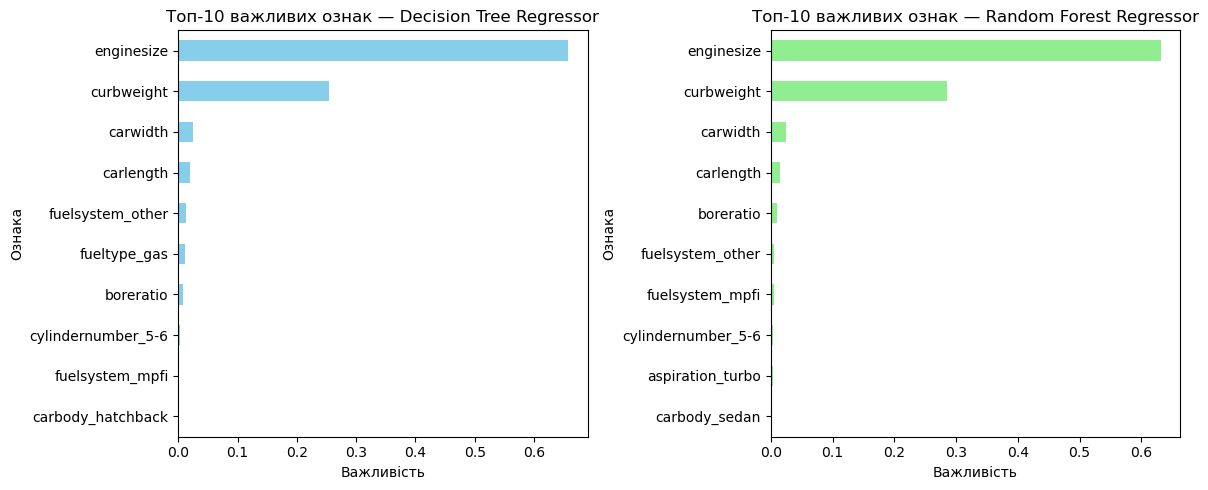

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Отримуємо важливість ознак ---
tree_importance = pd.Series(tree_model.feature_importances_, index=X_train.columns)
rf_importance   = pd.Series(rf_model.feature_importances_,   index=X_train.columns)

# Вибираємо топ-10 і сортуємо для красивого barh (знизу вгору)
top10_tree = tree_importance.nlargest(10).sort_values()
top10_rf   = rf_importance.nlargest(10).sort_values()

# --- 2. Будуємо графіки ---
plt.figure(figsize=(12, 5))

# Графік 1 — Decision Tree (топ-10)
plt.subplot(1, 2, 1)
top10_tree.plot(kind='barh', color='skyblue')
plt.title("Топ-10 важливих ознак — Decision Tree Regressor")
plt.xlabel("Важливість")
plt.ylabel("Ознака")

# Графік 2 — Random Forest (топ-10)
plt.subplot(1, 2, 2)
top10_rf.plot(kind='barh', color='lightgreen')
plt.title("Топ-10 важливих ознак — Random Forest Regressor")
plt.xlabel("Важливість")
plt.ylabel("Ознака")

plt.tight_layout()
plt.show()


### 6. Прогнозування ціни автомобілів  
Компанія розробила 5 варіантів нових моделей автомобілів, які планує почати виготовляти та постачати на ринок США. Тепер необхідно визначитися за якою ціною ці авто варто продавати.

In [10]:
# характеристики автомобілів, які плануються до випуску
#для зручності всі категоріальні дані вже перекодовано, пропусків в даних немає
new_cars = pd.read_csv('https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_5_Regression/Lecture/new_cars.csv')
new_cars

,carlength,carwidth,curbweight,enginesize,boreratio,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_l,enginetype_ohc/v/f,enginetype_rotor,cylindernumber_5-6,cylindernumber_8-12,fuelsystem_mpfi,fuelsystem_other
0,157.3,64.4,1918,92,2.97,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,173.2,66.3,2926,156,3.59,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,173.2,66.3,2818,156,3.59,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,176.2,65.6,2536,146,3.62,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,197.0,70.9,3505,209,3.62,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [11]:
#для зручності всі категоріальні дані вже перекодовано, пропусків в даних немає
new_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carlength            5 non-null      float64
 1   carwidth             5 non-null      float64
 2   curbweight           5 non-null      int64  
 3   enginesize           5 non-null      int64  
 4   boreratio            5 non-null      float64
 5   fueltype_gas         5 non-null      int64  
 6   aspiration_turbo     5 non-null      int64  
 7   doornumber_two       5 non-null      int64  
 8   carbody_hardtop      5 non-null      int64  
 9   carbody_hatchback    5 non-null      int64  
 10  carbody_sedan        5 non-null      int64  
 11  carbody_wagon        5 non-null      int64  
 12  drivewheel_fwd       5 non-null      int64  
 13  drivewheel_rwd       5 non-null      int64  
 14  enginelocation_rear  5 non-null      int64  
 15  enginetype_l         5 non-null      int64  

In [12]:
# виконуємо прогноз ціни нових моделей авто
pred = rf_model.predict(new_cars)

print('Спрогнозовано, що ціна нових автомобілів компанії BestCars має бути:')
for i in range(len(pred)):
    print(f'Автомобіль {i + 1}: {pred[i]:.2f} $')

Спрогнозовано, що ціна нових автомобілів компанії BestCars має бути:
Автомобіль 1: 5678.34 $
Автомобіль 2: 14415.57 $
Автомобіль 3: 13328.73 $
Автомобіль 4: 9771.29 $
Автомобіль 5: 36927.89 $
